In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Sara\anaconda3\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sara\anaconda3\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sara\anaconda3\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sara\anaconda3\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.num_examples

10000

In [11]:
import matplotlib.pyplot as plt

In [12]:
mnist.train.images.shape

(55000, 784)

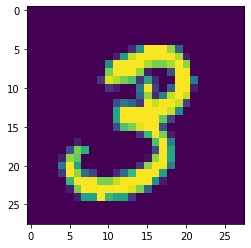

In [13]:
single_img=mnist.train.images[1].reshape(28,28)
plt.imshow(single_img)

In [15]:
#y=mx + b
x=tf.placeholder(tf.float32,shape=[None,784])

In [16]:
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [17]:
y=tf.matmul(x,w) + b

In [18]:
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [19]:
#Loss Function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [20]:
#Gradient Descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=optimizer.minimize(cross_entropy)

In [21]:
init=tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    
    for steps in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
    correct_prediction=tf.equal(tf.arg_max(y,1),tf.arg_max(y_true,1))
    acc=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print (sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
                                              

0.9183
